In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Preprocessing**

# Load dataset

In [52]:
# Load the dataset
data_path = "/content/bank-additional-full.csv"
dataset = pd.read_csv(data_path, sep=";")

# Reload the original 'pdays' column from the raw dataset
raw_data = pd.read_csv("/content/bank-additional-full.csv", sep=";")
dataset['pdays'] = raw_data['pdays']  # Restore raw 'pdays

dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Handle 'pdays' Categorization

In [53]:
# Categorizing 'pdays' simplifies analysis and enhances interpretability

# Ensure 'pdays' is numeric before categorization
dataset['pdays'] = pd.to_numeric(dataset['pdays'], errors="coerce")

# Categorize 'pdays'
def categorize_pdays(value):
    if value == 999:
        return "Not Contacted"
    elif value <= 7:
        return "Recently Contacted"
    else:
        return "Contacted Earlier"

# Apply categorization
dataset['pdays_category'] = dataset['pdays'].apply(categorize_pdays)

# Drop the original 'pdays' column if no longer needed
dataset.drop(columns=['pdays'], inplace=True)

# Verify the results
print("Unique values in 'pdays_category':")
print(dataset['pdays_category'].unique())
print("Value counts in 'pdays_category':")
print(dataset['pdays_category'].value_counts())

Unique values in 'pdays_category':
['Not Contacted' 'Recently Contacted' 'Contacted Earlier']
Value counts in 'pdays_category':
pdays_category
Not Contacted         39673
Recently Contacted     1177
Contacted Earlier       338
Name: count, dtype: int64


# Convert Numeric Columns

In [54]:
# Convert numeric columns to the correct data types
numeric_columns = ["age", "duration", "campaign", "previous",
                   "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for col in numeric_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors="coerce")  # Convert and handle errors

print("Dataset Overview After Preprocessing:")
print(dataset.info())

Dataset Overview After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float6

# Handle Missing Values

In [55]:
# Check for missing values
print("\nMissing Values Per Column:")
print(dataset.isnull().sum())

# Display unique values for categorical columns to identify inconsistencies
categorical_columns = dataset.select_dtypes(include=["object"]).columns.tolist()
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {dataset[col].unique()}")

# Replace "unknown" values with NaN in all columns to standardize missing values
dataset.replace("unknown", np.nan, inplace=True)

# Recheck for missing values after replacement
print("\nMissing Values After Replacing 'unknown':")
print(dataset.isnull().sum())


Missing Values Per Column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
pdays_category    0
dtype: int64

Unique Values in Categorical Columns:
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'no

In [56]:
# Impute missing values for categorical columns with low missing counts
for col in ["job", "marital", "education", "housing", "loan"]:
    mode_value = dataset[col].mode()[0]  # Get the mode of the column
    dataset[col] = dataset[col].fillna(mode_value)  # Replace NaN with the mode
    print(f"Imputed missing values in {col} with mode: {mode_value}")

# Drop heavily affected column (e.g., 'default') or rows
threshold = 0.2 * len(dataset)  # Define a threshold for acceptable missing values
high_missing_columns = dataset.columns[dataset.isnull().sum() > threshold]
dataset.drop(columns=high_missing_columns, inplace=True)
print(f"Dropped columns with excessive missing values: {list(high_missing_columns)}")

# Drop rows with remaining NaN values
dataset.dropna(inplace=True)
print("\nDataset shape after handling missing values:", dataset.shape, "\n")

print("\nCheck for remaining missing values:\n")
print(dataset.isnull().sum(),"\n")

dataset

Imputed missing values in job with mode: admin.
Imputed missing values in marital with mode: married
Imputed missing values in education with mode: university.degree
Imputed missing values in housing with mode: yes
Imputed missing values in loan with mode: no
Dropped columns with excessive missing values: ['default']

Dataset shape after handling missing values: (41188, 20) 


Check for remaining missing values:

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
pdays_category    0
dtype: int64 



,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_category
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not Contacted
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not Contacted
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not Contacted
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not Contacted
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Not Contacted
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Not Contacted
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Not Contacted
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Not Contacted


# **Visualization**

# Distribution of the target variable

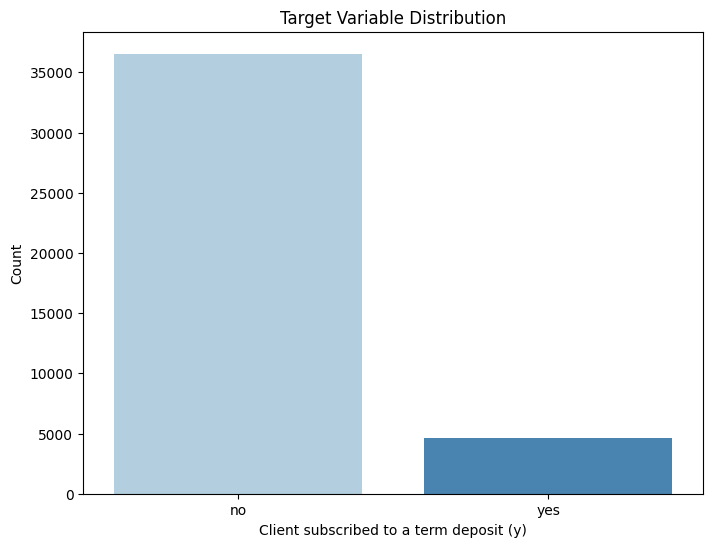

In [57]:
# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x='y', hue='y', data=dataset, palette='Blues', dodge=False, legend=False)
plt.title('Target Variable Distribution')
plt.xlabel('Client subscribed to a term deposit (y)')
plt.ylabel('Count')
plt.show()

# Categorical Features

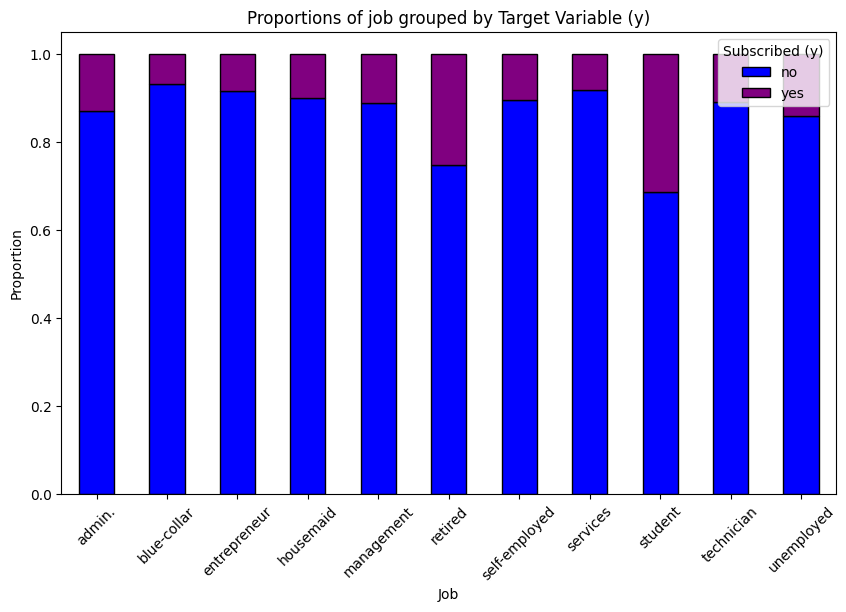

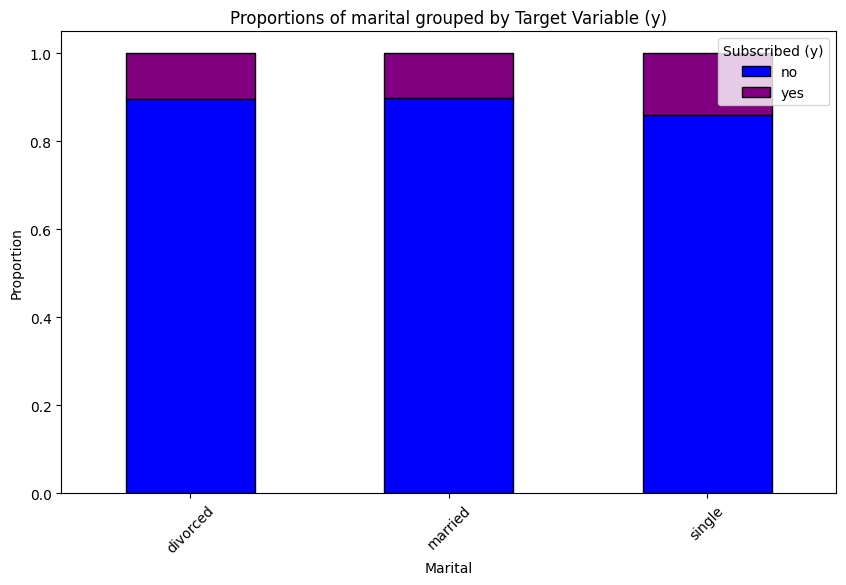

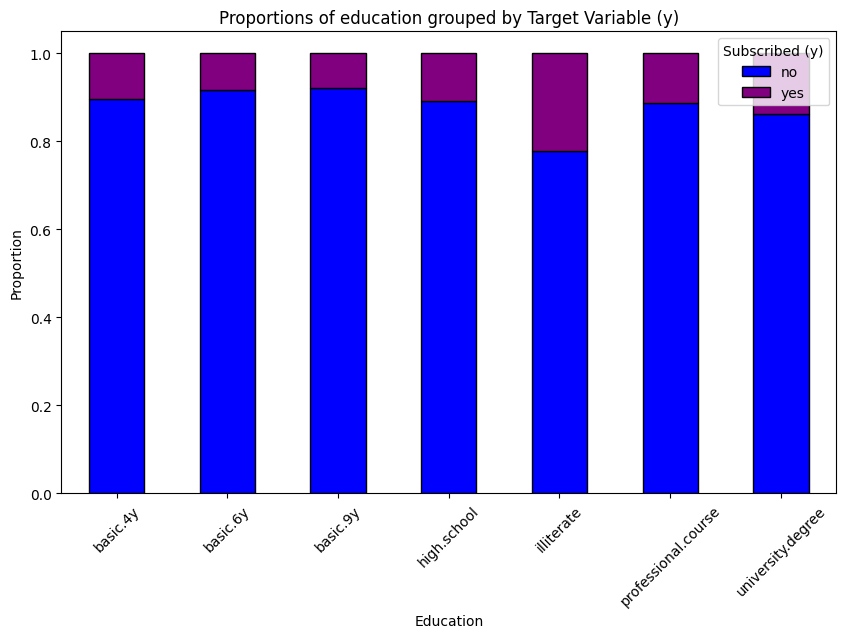

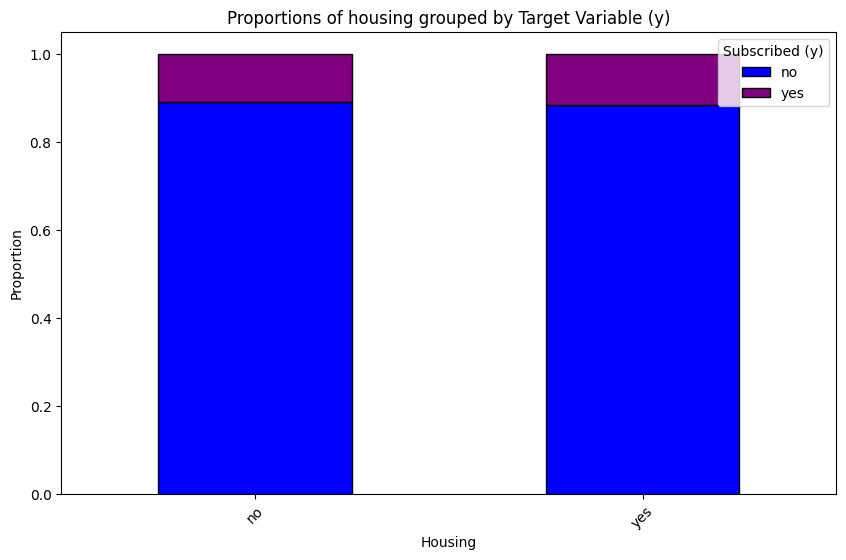

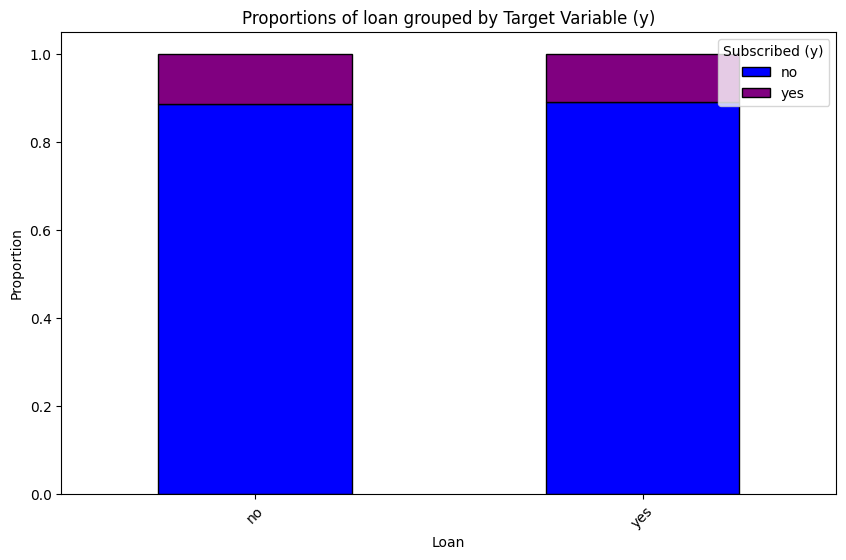

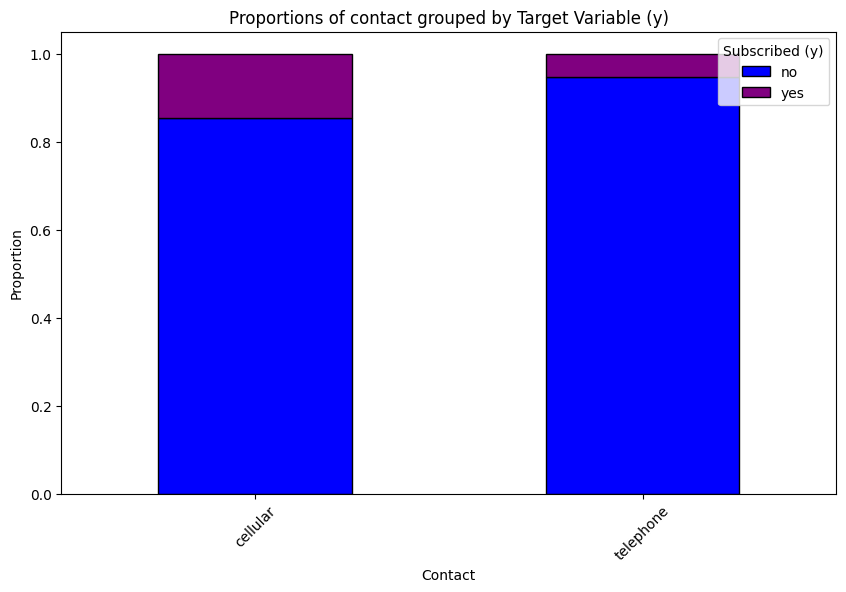

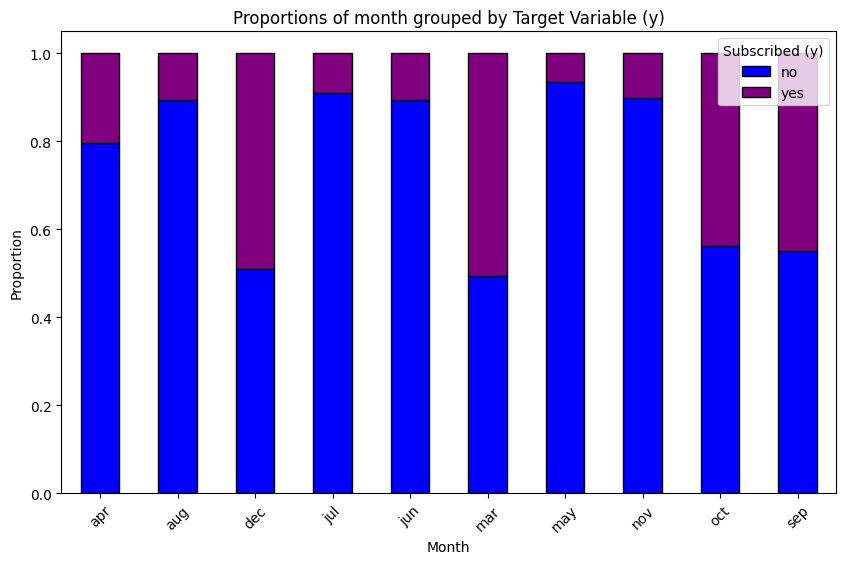

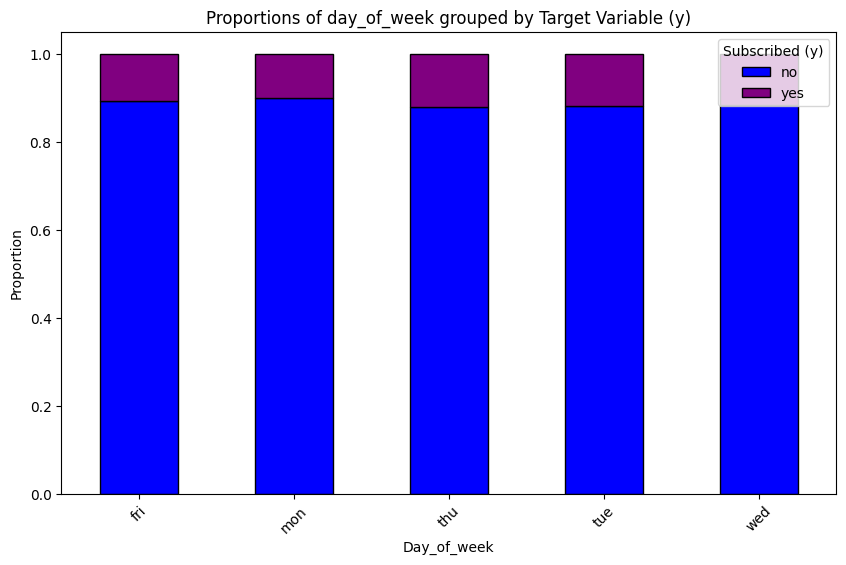

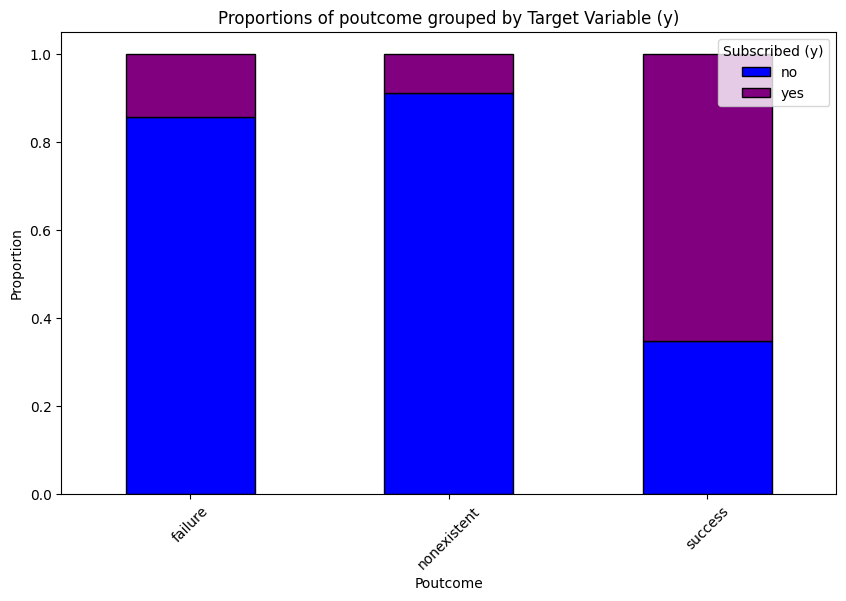

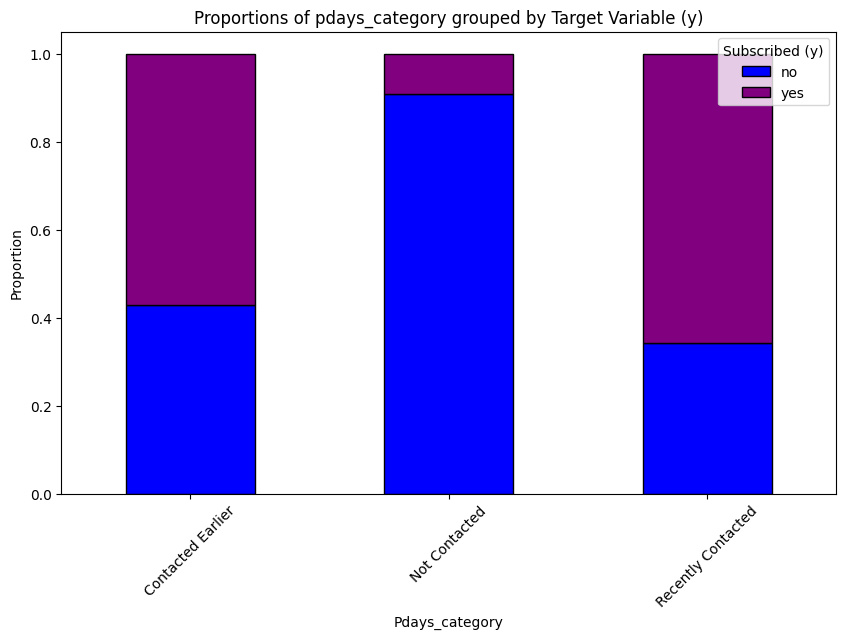

In [58]:
# Define categorical features
categorical_features = ['job', 'marital', 'education', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome', 'pdays_category']

# Visualize proportions of categorical features grouped by the target variable
for feature in categorical_features:
    # Calculate proportions
    proportions = pd.crosstab(dataset[feature], dataset['y'], normalize='index')

    # Plot
    proportions.plot(kind='bar', stacked=True, figsize=(10, 6) ,color=['blue', 'purple'], edgecolor='black')
    plt.title(f'Proportions of {feature} grouped by Target Variable (y)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed (y)', loc='upper right')
    plt.show()

# Histograms for Numerical Features

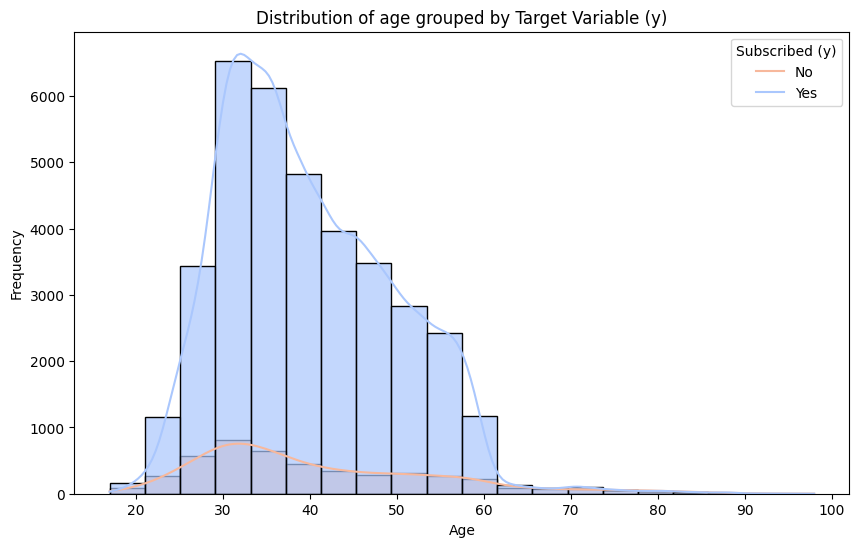

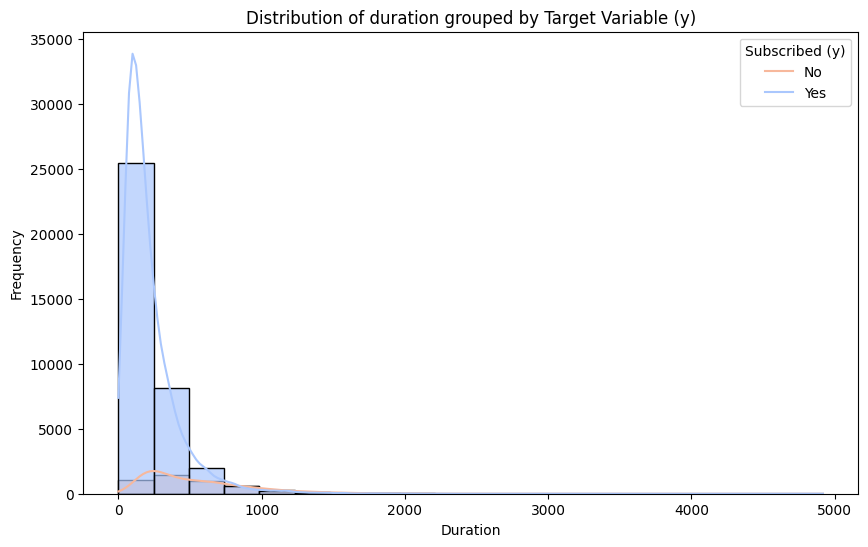

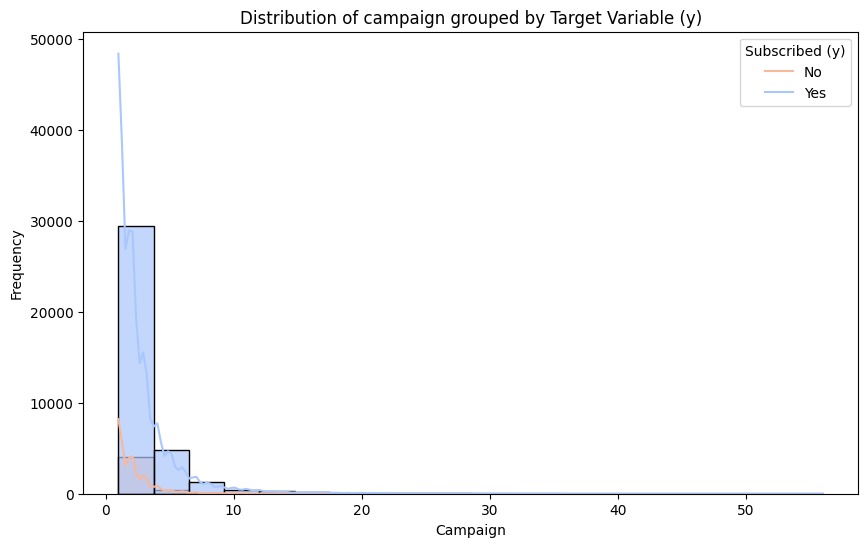

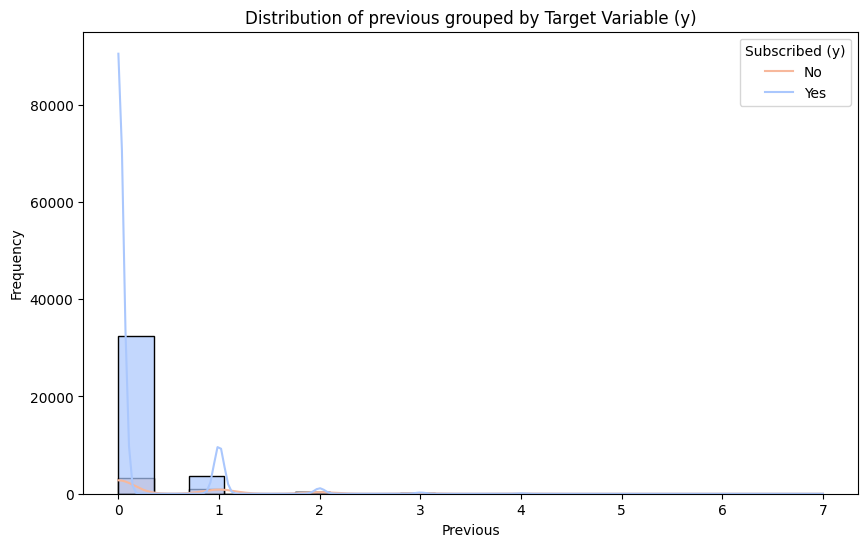

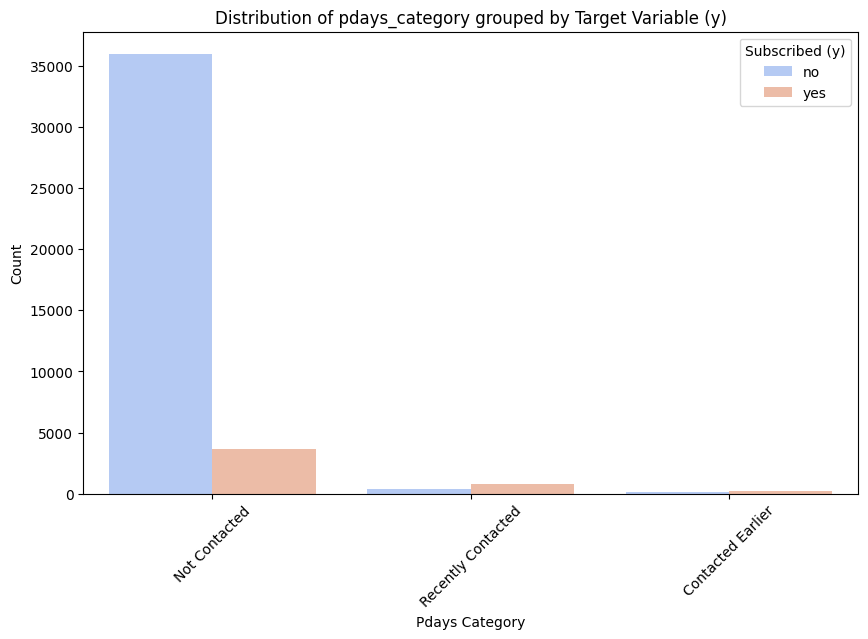

In [59]:
# Visualize the distribution of numerical features
numerical_features = ["age", "duration", "campaign", "previous"]

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataset, x=feature, hue='y', kde=True, palette='coolwarm', bins=20, alpha=0.7)
    plt.title(f'Distribution of {feature} grouped by Target Variable (y)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])  # explicit legend labels
    plt.show()

# Visualize pdays_category
plt.figure(figsize=(10, 6))
sns.countplot(x='pdays_category', hue='y', data=dataset, palette='coolwarm')
plt.title('Distribution of pdays_category grouped by Target Variable (y)')
plt.xlabel('Pdays Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.show()

# Box plots for outliers in numerical features

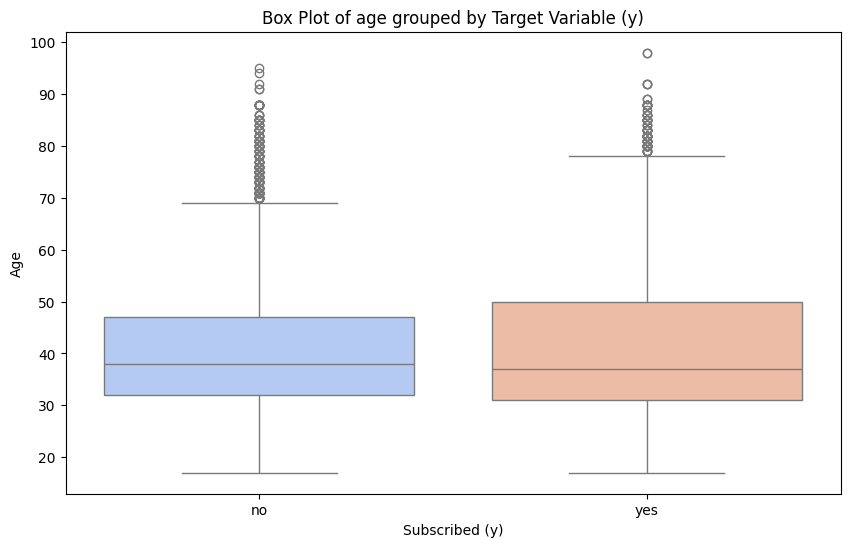

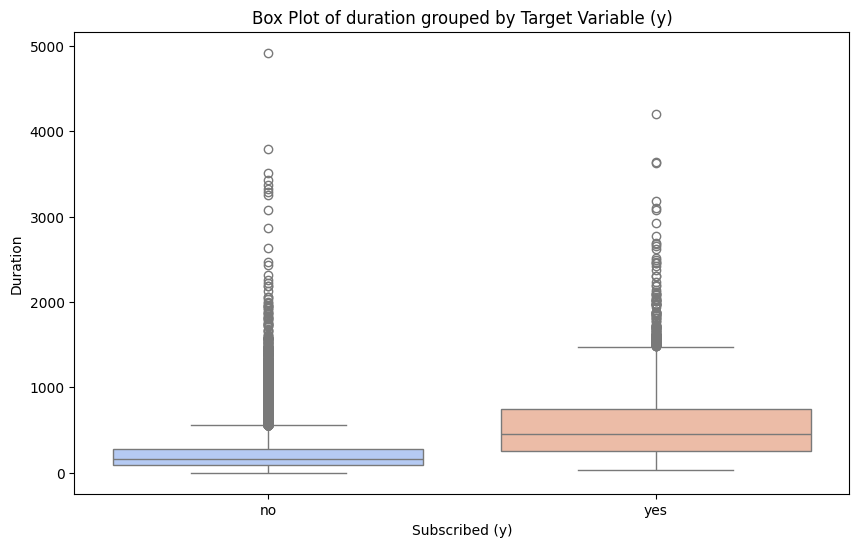

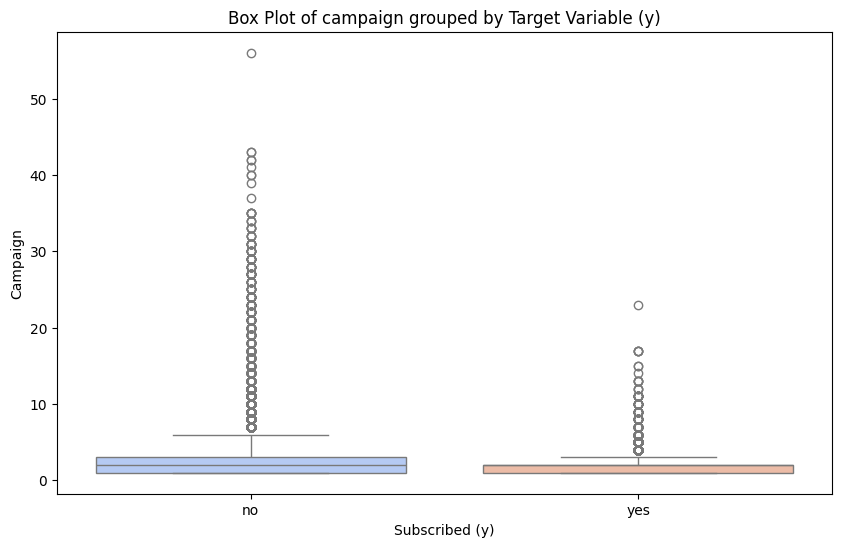

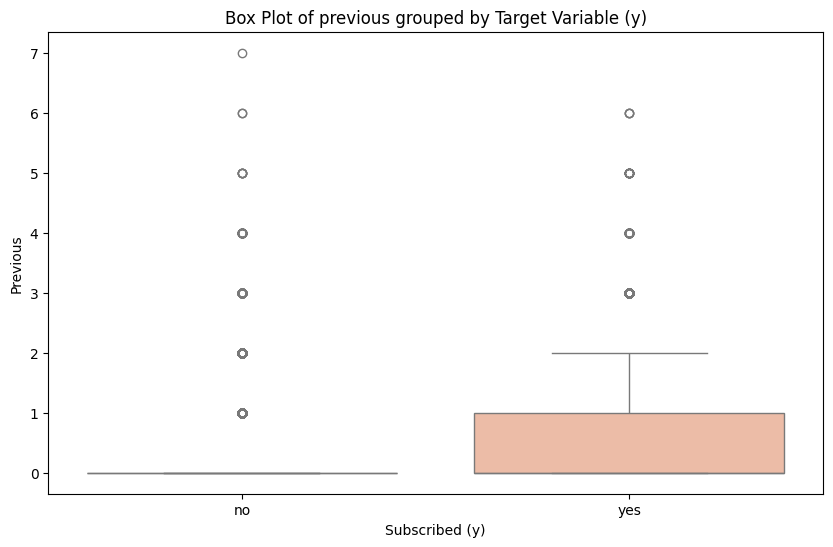

In [60]:
# Box plots to check for outliers in numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=feature, hue='y', data=dataset, dodge=False, palette='coolwarm')  # Assign x to hue
    plt.title(f'Box Plot of {feature} grouped by Target Variable (y)')
    plt.xlabel('Subscribed (y)')
    plt.ylabel(feature.capitalize())
    plt.legend([], [], frameon=False)  # remove redundant legends
    plt.show()

# **Encoding Categorical Features**

In [61]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features to encode
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'pdays_category', 'y']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    dataset[col] = le.fit_transform(dataset[col])

# Check encoded dataset
print("Dataset after encoding categorical features:","\n")
print(dataset.head())


Dataset after encoding categorical features: 

   age  job  marital  education  housing  loan  contact  month  day_of_week  \
0   56    3        1          0        0     0        1      6            1   
1   57    7        1          3        0     0        1      6            1   
2   37    7        1          3        1     0        1      6            1   
3   40    0        1          1        0     0        1      6            1   
4   56    7        1          3        0     1        1      6            1   

   duration  campaign  previous  poutcome  emp.var.rate  cons.price.idx  \
0       261         1         0         1           1.1          93.994   
1       149         1         0         1           1.1          93.994   
2       226         1         0         1           1.1          93.994   
3       151         1         0         1           1.1          93.994   
4       307         1         0         1           1.1          93.994   

   cons.conf.idx  euribor3m

# **Scaling Numerical Features**

In [62]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_columns = ["age", "duration", "campaign", "previous",
                     "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Check scaled dataset
print("Summary statistics for scaled numerical features:")
print(dataset[numerical_columns].describe())


Summary statistics for scaled numerical features:
                age      duration      campaign      previous  emp.var.rate  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -1.397348e-17 -7.590531e-17  5.520386e-18  7.797546e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -9.961775e-01 -5.659220e-01 -3.494943e-01 -2.216433e+00   
25%   -7.699804e-01 -6.027745e-01 -5.659220e-01 -3.494943e-01 -1.197935e+00   
50%   -1.942267e-01 -3.019369e-01 -2.049085e-01 -3.494943e-01  6.480923e-01   
75%    6.694038e-01  2.341712e-01  1.561049e-01 -3.494943e-01  8.390606e-01   
max    5.563310e+00  1.797202e+01  1.928982e+01  1.379492e+01  8.390606e-01   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    4.118800e+04   4.118800e+04  41188.000000  4.118800e+04  
mean    -3.315820e-14  -1.352495e-16      0.000000 -1.024860e-14  
std      1.000012e+00   1.000012e+00 

# **Feature selection**

In [63]:
# Display dataset before feature selection
print("\nColumns in the dataset before feature selection:")
print(dataset.columns)

# Feature Selection Code
correlation_matrix = dataset.corr()
correlated_features = set()
threshold = 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
dataset.drop(columns=correlated_features, inplace=True)
print("\n")
print(f"Features dropped due to high correlation: {correlated_features}","\n")

# Display dataset after feature selection
print("\nColumns in the dataset after feature selection:")
print(dataset.columns)


Columns in the dataset before feature selection:
Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'pdays_category'],
      dtype='object')


Features dropped due to high correlation: {'nr.employed', 'euribor3m'} 


Columns in the dataset after feature selection:
Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y',
       'pdays_category'],
      dtype='object')


# Correlation Heatmap

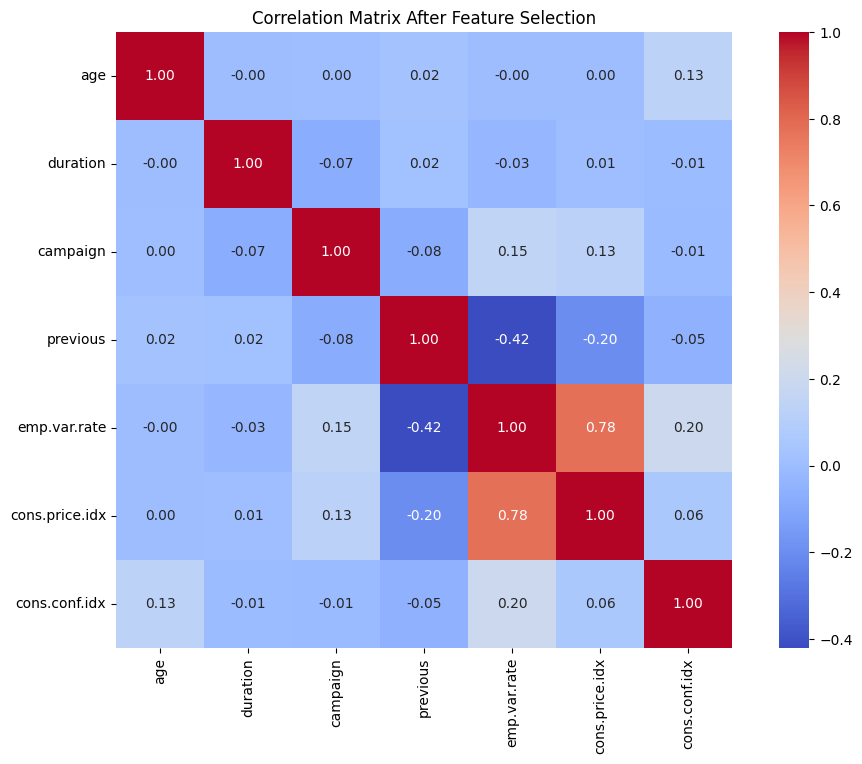

In [64]:
# Correlation heatmap for numerical features
numerical_features = ["age", "duration", "campaign", "previous",
                      "emp.var.rate", "cons.price.idx", "cons.conf.idx"]

# Calculate correlation matrix
correlation_matrix = dataset[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix After Feature Selection")
plt.show()

# **Handle Class Imbalance**

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = dataset.drop(columns=['y'])
y = dataset['y']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Training and testing sets created.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE:
y
0    36548
1    36548
Name: count, dtype: int64
Training and testing sets created.


# PCA for Dimensionality Reduction

In [66]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the number of components
print(f"Number of components after PCA: {pca.n_components_}")


Number of components after PCA: 10


# Display

In [67]:
dataset

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdays_category
0,1.533034,3,1,0,0,0,1,6,1,0.010471,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0,1
1,1.628993,7,1,3,0,0,1,6,1,-0.421501,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0,1
2,-0.290186,7,1,3,1,0,1,6,1,-0.124520,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0,1
3,-0.002309,0,1,1,0,0,1,6,1,-0.413787,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0,1
4,1.533034,7,1,3,0,1,1,6,1,0.187888,-0.565922,-0.349494,1,0.648092,0.722722,0.886447,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,5,1,5,1,0,0,7,0,0.292025,-0.565922,-0.349494,1,-0.752343,2.058168,-2.224953,1,1
41184,0.573445,1,1,5,0,0,0,7,0,0.481012,-0.565922,-0.349494,1,-0.752343,2.058168,-2.224953,0,1
41185,1.533034,5,1,6,1,0,0,7,0,-0.267225,-0.204909,-0.349494,1,-0.752343,2.058168,-2.224953,0,1
41186,0.381527,9,1,5,0,0,0,7,0,0.708569,-0.565922,-0.349494,1,-0.752343,2.058168,-2.224953,1,1


Shape of X_train: (58476, 17)
Shape of X_test: (14620, 17)
Shape of y_train: (58476,)
Shape of y_test: (14620,)




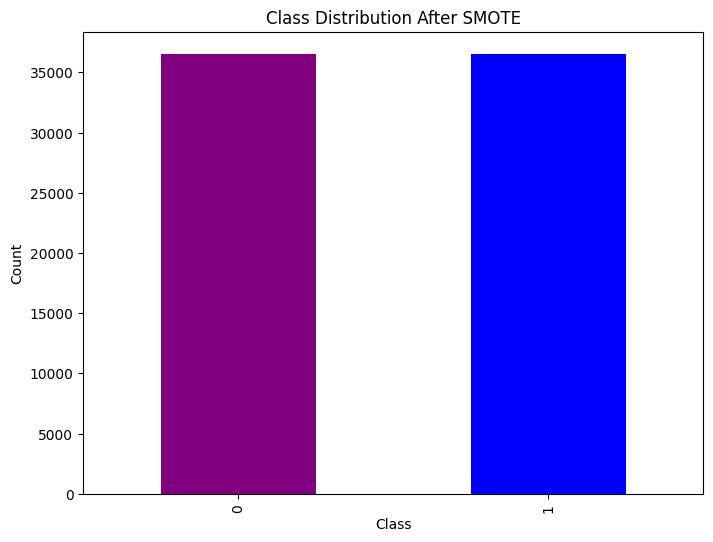

In [68]:
# Print the shapes of training and testing sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\n")

import matplotlib.pyplot as plt

# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
y_resampled.value_counts().plot(kind='bar', color=['purple', 'blue'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# **Predective model using Random Forest Model**

In [69]:
# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape, "\n")

# Splitting the data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X: (41188, 17)
Shape of y: (41188,) 

Shape of X_train: (58476, 17)
Shape of X_test: (14620, 17)
Shape of y_train: (58476,)
Shape of y_test: (14620,)


# Intiliaze the model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model with parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict and Evaluate

In [89]:
# Calculate training set accuracy
rf_train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Set Accuracy: {rf_train_accuracy:.4f}")

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate testing set accuracy
rf_test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Set Accuracy: {rf_test_accuracy:.4f}")


Training Set Accuracy: 1.0000
Testing Set Accuracy: 0.9453


In [90]:
from sklearn.metrics import roc_auc_score

# Calculate and display ROC-AUC score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"Random Forest ROC-AUC Score: {roc_auc:.4f}")


Random Forest ROC-AUC Score: 0.9900


In [91]:
# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.92      0.94      7332
     Class 1       0.92      0.97      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



# Visualizing Results

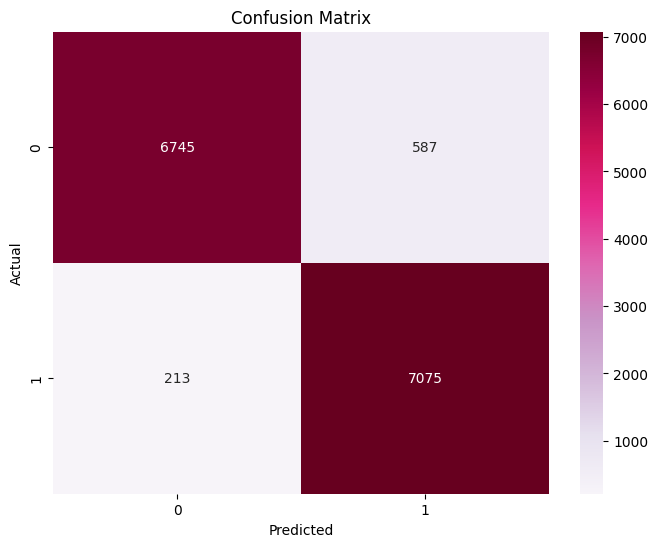

In [92]:
from sklearn.metrics import roc_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuRd")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Predective model using Artificial Neural Network**

# ANN Model Initialization

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
ann_model = Sequential()

# Input layer and first hidden layer
ann_model.add(Dense(units=16, activation='relu', input_dim=X_train_pca.shape[1]))

# Second hidden layer
ann_model.add(Dense(units=8, activation='relu'))

# Output layer
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the ANN structure
ann_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

# Training the ANN

In [76]:
# Train the model
history = ann_model.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7996 - loss: 0.4405 - val_accuracy: 0.8669 - val_loss: 0.3231
Epoch 2/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8695 - loss: 0.3229 - val_accuracy: 0.8776 - val_loss: 0.2993
Epoch 3/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.3038 - val_accuracy: 0.8839 - val_loss: 0.2867
Epoch 4/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8812 - loss: 0.2938 - val_accuracy: 0.8876 - val_loss: 0.2794
Epoch 5/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8825 - loss: 0.2907 - val_accuracy: 0.8895 - val_loss: 0.2755
Epoch 6/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.2867 - val_accuracy: 0.8899 - val_loss: 0.2719
Epoch 7/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8891 - loss: 0.2783 - val_accuracy: 0.8916 - val_loss: 0.2705
Epoch 8/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8899 - loss: 0.2756 - 

# Visualizing Training Performance

In [77]:
from sklearn.metrics import roc_auc_score

# Calculate and display ROC-AUC score
roc_auc = roc_auc_score(y_test, ann_model.predict(X_test_pca))
print(f"ANN ROC-AUC Score: {roc_auc:.4f}")

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
ANN ROC-AUC Score: 0.9547


In [94]:
# Calculate training set accuracy
ann_train_accuracy = ann_model.evaluate(X_train_pca, y_train, verbose=0)[1]
print(f"Training Set Accuracy: {ann_train_accuracy:.4f}")

# Evaluate on the test set
ann_test_accuracy = ann_model.evaluate(X_test_pca, y_test, verbose=0)[1]
print(f"Testing Set Accuracy: {ann_test_accuracy:.4f}")

Training Set Accuracy: 0.9004
Testing Set Accuracy: 0.9035


457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.86      0.90      7332
     Class 1       0.87      0.95      0.91      7288

    accuracy                           0.90     14620
   macro avg       0.91      0.90      0.90     14620
weighted avg       0.91      0.90      0.90     14620



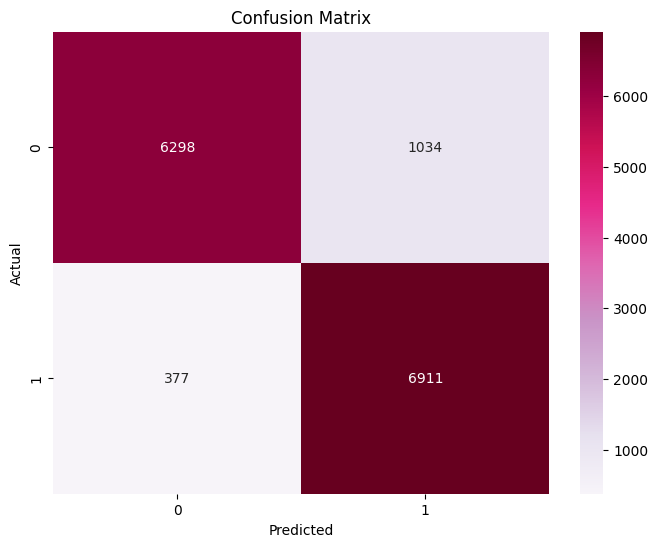

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = (ann_model.predict(X_test_pca) > 0.5).astype("int32")

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("\nClassification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuRd")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparison

In [98]:
from IPython.display import display

# Create a DataFrame for comparison
comparison_data = {
    "Model": ["Random Forest", "ANN"],
    "Training Accuracy": [rf_train_accuracy, ann_train_accuracy],
    "Test Accuracy": [rf_test_accuracy, ann_test_accuracy],
}

comparison_table = pd.DataFrame(comparison_data)

# Display the table
print(comparison_table.to_string(index=False))


        Model  Training Accuracy  Test Accuracy
Random Forest           0.999983       0.945280
          ANN           0.900352       0.903488
